In [69]:
import dill
with open('data_25664.pkl', 'rb') as f:
  data = dill.load(f)

# Crop Data

In [70]:
old_image_size = data['left_cam'][0].shape
new_image_size = [64, 64]
y_start = int((old_image_size[0] - new_image_size[0]) / 2)
x_start = int((old_image_size[1] - new_image_size[1]) / 2)
y_end = int((old_image_size[0] + new_image_size[0]) / 2)
x_end = int((old_image_size[1] + new_image_size[1]) / 2)

In [71]:
from copy import deepcopy
data_new = deepcopy(data)

In [72]:
for i, im in enumerate(data['left_cam']):
  data_new['left_cam'][i] = im[y_start:y_end, x_start:x_end]
for i, im in enumerate(data['right_cam']):
  data_new['right_cam'][i] = im[y_start:y_end, x_start:x_end]
print(data_new['left_cam'][0].shape)

(64, 64)


In [73]:
with open('data_new.pkl', 'wb') as f:
  dill.dump(data_new, f)

# Constraint Height

In [74]:
old_image = np.array(data['left_cam'][10])

In [75]:
import numpy as np
import matplotlib.pyplot as plt
max_depth = 0.002

In [76]:
min_dist = np.min(old_image)
max_dist = min_dist + max_depth

In [77]:
new_image = deepcopy(old_image)
new_image[new_image > max_dist] = 0

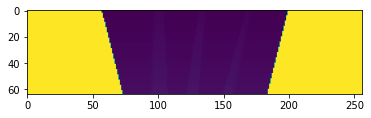

In [78]:
plt.imshow(old_image/np.max(old_image))

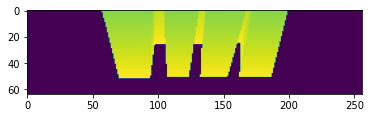

In [79]:
plt.imshow(new_image/max_dist)

In [80]:
data_new = deepcopy(data)
for i, im in enumerate(data['left_cam']):
  min_dist = np.min(im)
  max_dist = min_dist + max_depth
  data_new['left_cam'][i][im > max_dist] = 0
for i, im in enumerate(data['right_cam']):
  min_dist = np.min(im)
  max_dist = min_dist + max_depth
  data_new['right_cam'][i][im > max_dist] = 0

In [81]:
with open('data_25664_dep2e-3.pkl', 'wb') as f:
  dill.dump(data_new, f)